# Overview of Notebook

The following notebook will display the target wine label. Afterwards, the notebook will display images of labels that the deep learning one shot system selects as being fraudulent. Then the notebook will display images of labels that the system selects as being non-fradulent.

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import tensorflow as tf
import numpy as np
import os


testdata_dir = os.environ['MLDIR'] + "TestData/"
np.random.seed(1000)
img_shape = (224, 224, 3)
l2_reg = 0
wine_model = Sequential()
wine_model.add(Conv2D(96, (11, 11), input_shape=img_shape, padding='same', kernel_regularizer=l2(l2_reg)))
wine_model.add(BatchNormalization())
wine_model.add(Activation('relu'))
wine_model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2 
wine_model.add(Conv2D(256, (5, 5), padding='same'))
wine_model.add(BatchNormalization())
wine_model.add(Activation('relu'))
wine_model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 3
wine_model.add(ZeroPadding2D((1, 1)))
wine_model.add(Conv2D(512, (3, 3), padding='same'))
wine_model.add(BatchNormalization()) 
wine_model.add(Activation('relu'))
wine_model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 4
wine_model.add(ZeroPadding2D((1, 1)))
wine_model.add(Conv2D(1024, (3, 3), padding='same')) 
wine_model.add(BatchNormalization())
wine_model.add(Activation('relu'))
# Layer 5
wine_model.add(ZeroPadding2D((1, 1)))
wine_model.add(Conv2D(1024, (3, 3), padding='same'))
wine_model.add(BatchNormalization())
wine_model.add(Activation('relu'))
wine_model.add(MaxPooling2D(pool_size=(2, 2)))

import cv2
import matplotlib.pyplot as plt

from PIL import Image

x = np.zeros((2, 224, 224, 3))

# Load target, and secondary test wine label image
subject01 = Image.open(testdata_dir + 'label_fraud/wine_label_fraud/Wine_Label_1.png')
subject02 = Image.open(testdata_dir + 'label_fraud/wine_label_fraud/images/test8.png')

# Normalize target wine label image
subject01 = subject01.convert('RGB')
subject02 = subject02.convert('RGB')
subj01 = subject01.resize((224, 224))
subj02 = subject02.resize((224, 224))
subj01_a = np.array(subj01)
subj02_a = np.array(subj02)
x[0] = subj01_a
x[1] = subj02_a

# Process target wine label image through the wine_model
x_out_1 = wine_model.predict(x[0:2])
x_out_1_r = np.ravel(x_out_1[0])
x_out_2_r = np.ravel(x_out_1[1])

# Generate histogram, and correlation product for the target wine label image
be_l, hist_l = np.histogram(x_out_1_r, bins=100000, range=[0.0, 50.0], density = True)
cor01 = np.dot(be_l[:], be_l[:])

be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 50.0], density = True)
cor02 = np.dot(be_h[:], be_l[:])

#print('cor01 = ' + str(cor01) + ' cor02 = ' + str(cor02))





# Target Wine Label

# Test Wine Labels

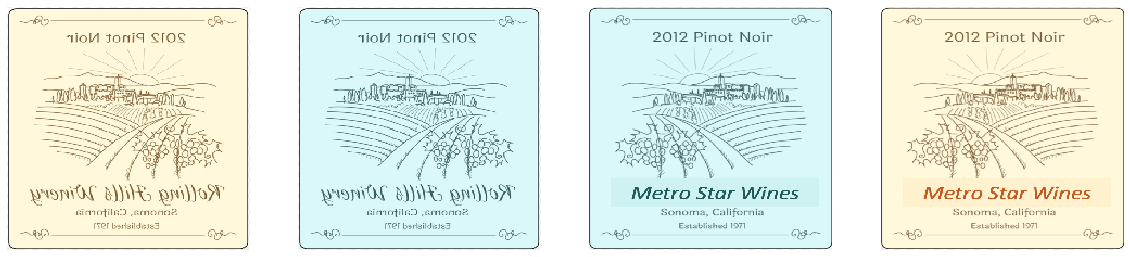

In [8]:
from os import walk
import cv2

mypath = testdata_dir + 'label_fraud/wine_label_fraud/images/'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.append(filenames)
    break
    
#print(f[0])
similar_diff = 0.0105*cor01
index = 0
img_list = []
for fn in f[0]:
    # load in test wine label image
    subject02 = Image.open(mypath + fn)
  
    # Normalize the test wine label image
    subject02 = subject02.convert('RGB')
    subj02 = subject02.resize((224, 224))
    subj02_a = np.array(subj02)
    x[0] = subj02_a
 
    # Process the test wine label image through the wine_model
    x_out_2 = wine_model.predict(x[0:1])
    x_out_2_r = np.ravel(x_out_2[0])
    
    # Generate the histogram, and correlation product of the test wine label image
    be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 50.0], density = True)
    cor02 = np.dot(be_h[:], be_l[:])
    diff = np.abs(cor02-cor01)
#    print(str(cor02) + 'diff = ' + str(diff) + ' similar_diff = '+ str(similar_diff) + ' ' + fn)
    # Threshold the correlation product to determine if it is a fraudulent label
    if(diff < similar_diff):
        img_list.append(subj02_a)

# Display the fraudulent labels
(a1, a2) = plt.subplots(1,4, figsize=(20,20))
a2[0].imshow(img_list[0])
a2[0].axis('off')

a2[1].imshow(img_list[1])
a2[1].axis('off')

a2[2].imshow(img_list[2])
a2[2].axis('off')

a2[3].imshow(img_list[3])
a2[3].axis('off')
plt.show()

# Test Wine Labels Selected as Fraudulent

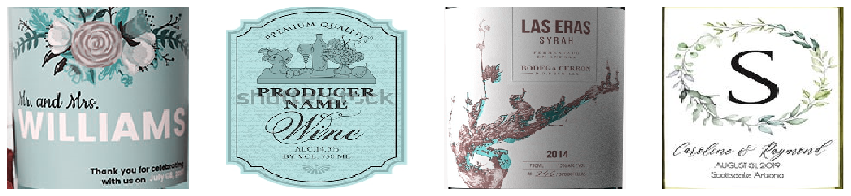

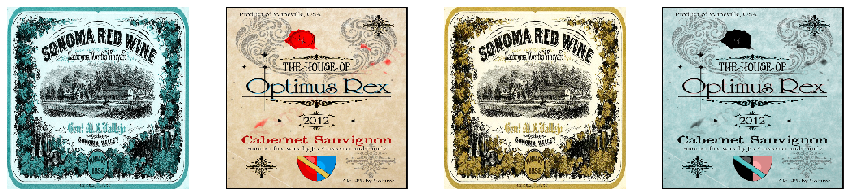

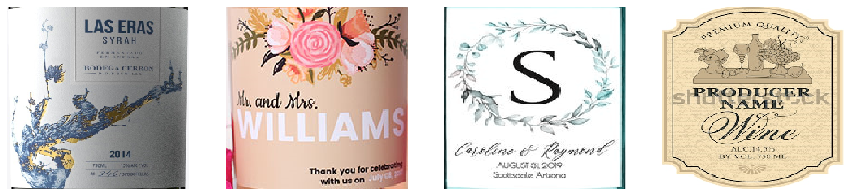

In [9]:

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.append(filenames)
    break
    
similar_diff = 0.0105*cor01
img_list = []
for fn in f[0]:
    
    # Load the test wine label image
    subject02 = Image.open(mypath + fn)
    
    # Normalize the wine label image
    subject02 = subject02.convert('RGB')
    subj02 = subject02.resize((224, 224))
    subj02_a = np.array(subj02)
    x[0] = subj02_a
 
    # Process the test wine label image through the wine_model
    x_out_2 = wine_model.predict(x[0:1])
    x_out_2_r = np.ravel(x_out_2[0])
    
    # Generate the histogram, and correlation product to be thresholed to determine if it is non-fraudulent
    be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 50.0], density = True)
    cor02 = np.dot(be_h[:], be_l[:])
    diff = np.abs(cor02-cor01)
#    print(str(cor02) + 'diff = ' + str(diff) + ' similar_diff = '+ str(similar_diff) + ' ' + fn)
    # Threshold to test if the test wine label image is non-fraudulent
    if(diff > similar_diff):
        img_list.append(subj02_a)

# Display the non-fraudulent wine labels
(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[0])
a2[0].axis('off')

a2[1].imshow(img_list[1])
a2[1].axis('off')

a2[2].imshow(img_list[2])
a2[2].axis('off')

a2[3].imshow(img_list[3])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[4])
a2[0].axis('off')

a2[1].imshow(img_list[5])
a2[1].axis('off')

a2[2].imshow(img_list[6])
a2[2].axis('off')

a2[3].imshow(img_list[7])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[8])
a2[0].axis('off')

a2[1].imshow(img_list[9])
a2[1].axis('off')

a2[2].imshow(img_list[10])
a2[2].axis('off')

a2[3].imshow(img_list[11])
a2[3].axis('off')
plt.show()

# Test Wine Labels Selected as Non-Fraudulent